In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [4]:
df.isnull().sum()   # There is no missing values

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

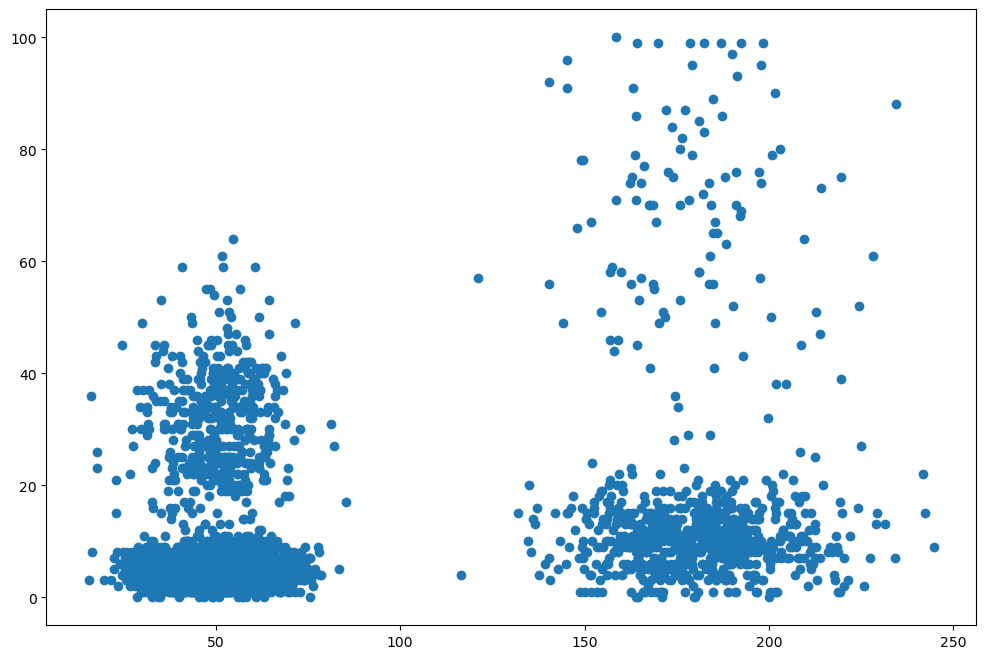

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(x = df["mean_dist_day"],y = df["mean_over_speed_perc"])

In [6]:
df.drop("id",axis = 1 , inplace = True)
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [7]:
## import and apply K means clustering 

from sklearn.cluster import KMeans

K_cluster = KMeans(n_clusters = 2)      # starting with k = 2

cluster_model = K_cluster.fit(df)

new_clusters = cluster_model.predict(df)



In [8]:
new_clusters

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
df["clusters"] = new_clusters     ## adding a new column

In [10]:
cluster_model.cluster_centers_    ## centroids of cluster

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [11]:
df.head()

,mean_dist_day,mean_over_speed_perc,clusters
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


<Axes: xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

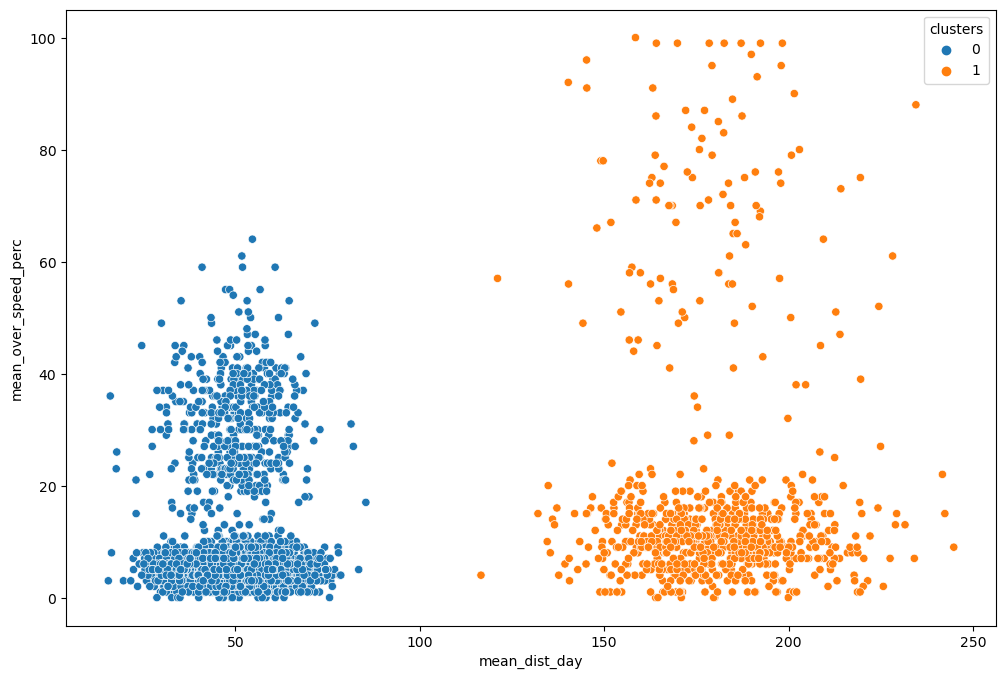

In [12]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = df["mean_dist_day"],y = df["mean_over_speed_perc"],hue = df["clusters"])


In [13]:
df.drop("clusters",axis = 1,inplace = True)

In [14]:
## lets do this exercise with different k values

def make_clusters(k,data):
    
    K_cluster = KMeans(n_clusters = k)      
    cluster_model = K_cluster.fit(df)
    new_clusters = cluster_model.predict(df)
    
    data["clusters"] = new_clusters
    plt.figure(figsize = (12,8))
    sns.scatterplot(x = data["mean_dist_day"],y = data["mean_over_speed_perc"],hue = data["clusters"])
    
    
    

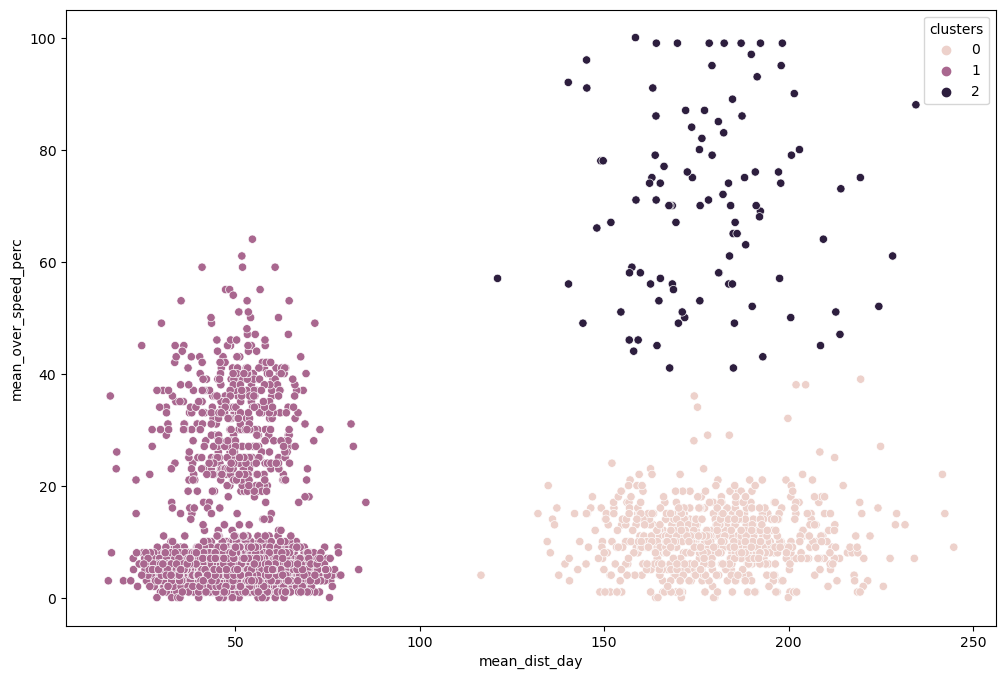

In [15]:
make_clusters(3,df)   # k = 3

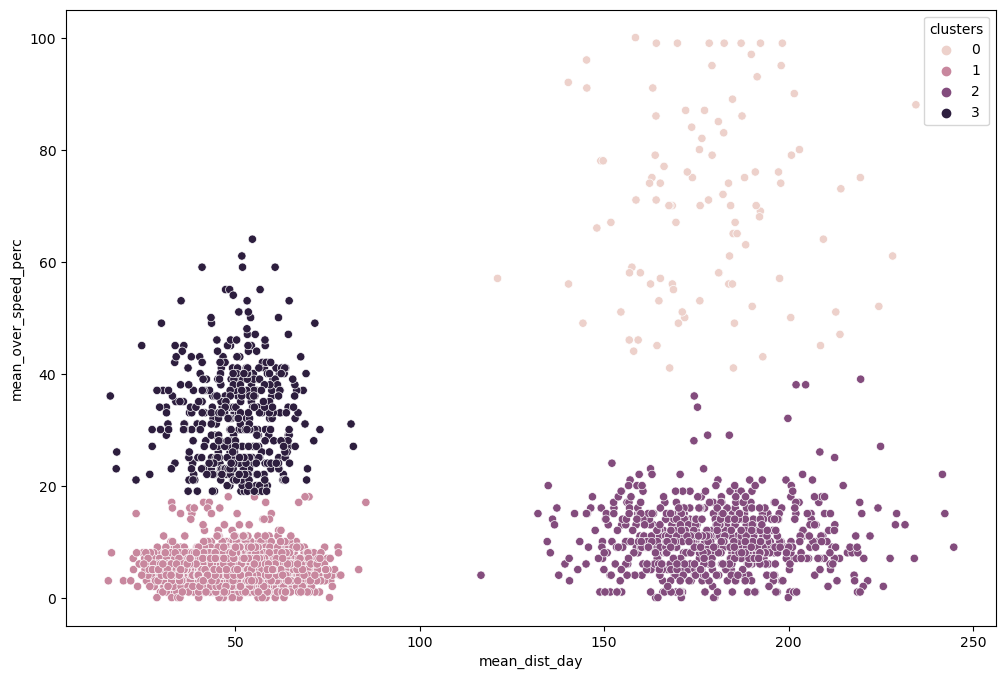

In [16]:
make_clusters(4,df)   # k = 4

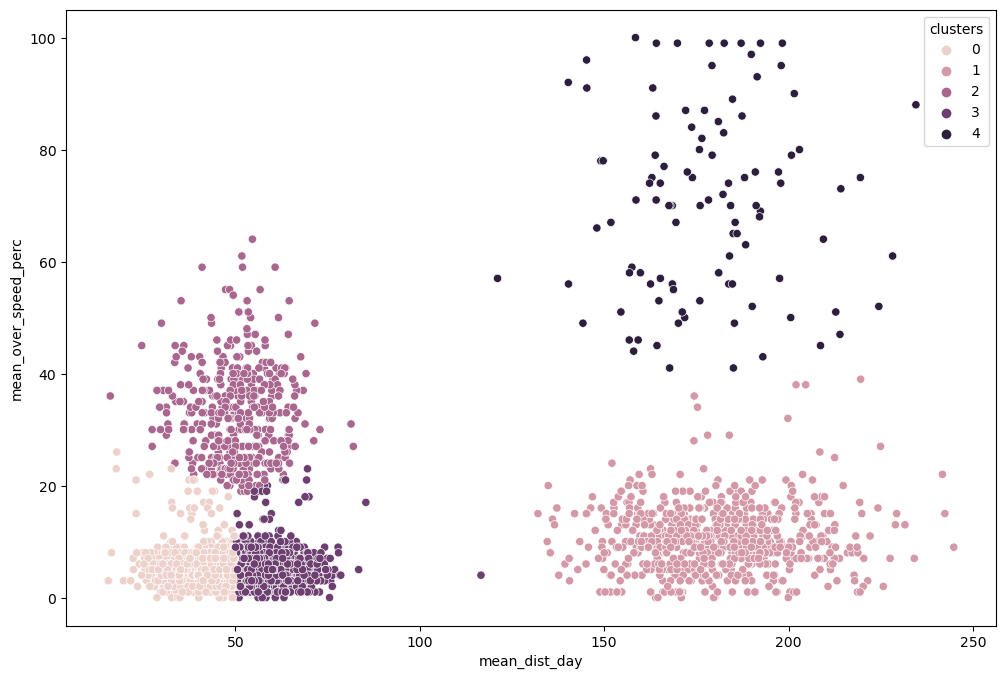

In [17]:
make_clusters(5,df)   # k = 5

# Finding optimum K value

In [18]:
wcss=[]      #within a cluster sum of square (c-xi)2   

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=1) #Start with same random data point as centroid ,random_state=1
    kmeans.fit_predict(df)
    wcss.append(kmeans.inertia_)  #the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [19]:
wcss

[12191839.073627977,
 1323611.4446977184,
 999011.8936731202,
 725901.0615447151,
 534740.6141961693,
 372956.2170444925,
 322771.6053378518,
 279945.6793150662,
 255678.57453657186,
 233063.06670008175]

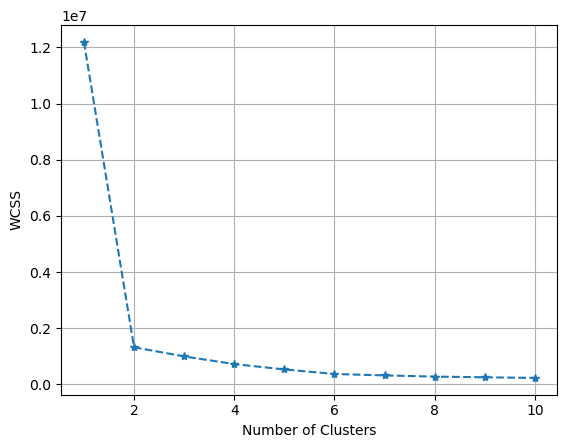

In [20]:
# Elbow method
plt.plot(range(1,11),wcss,"*--")
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
## so from elbow curve we can see tha k = 2 is a good k value to start with 